In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
Progression = pd.read_csv("C:/Users/melod/Desktop/RongRong/Dry/WGCNA/Pro_Re/Pro_top2000_matrix.csv" , index_col = 0)
Regression = pd.read_csv("C:/Users/melod/Desktop/RongRong/Dry/WGCNA/Pro_Re/Re_top2000_matrix.csv" , index_col = 0)

In [3]:
#Get the intersect between df
genes = list(set(Progression.index) & set(Regression.index))

In [21]:
Progression_inter = Progression.loc[genes].T
Progression_inter["condition"] = 0

In [22]:
Regression_inter = Regression.loc[genes].T
Regression_inter["condition"] = 1

In [23]:
data_inter_all = pd.concat([Progression_inter , Regression_inter])

In [24]:
data_inter_all.head()

,9130230L23Rik,Gm44734,Cd2,Ppp1r1a,Apbb2,Ccr2,Vcam1,Ccn2,Akap6,Gadd45b,...,Racgap1,Tor1aip1,Tex14,Rhoc,Frmpd4,Snhg15,Gm36723,Cfap45,Cmpk2,condition
AAACCTGCAAACTGCT.1,0.0,0.0,0.00000,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,2.486007,0.000000,0.0,0.000000,0.0,0.0,0.0,0
AAACCTGCAAGCGAGT.1,0.0,0.0,0.00000,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0
AAACCTGCACGGTGTC.1,0.0,0.0,2.06342,0.0,0.0,2.06342,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,1.191177,0.0,1.191177,0.0,0.0,0.0,0
AAACCTGCAGCGAACA.1,0.0,0.0,0.00000,0.0,0.0,0.00000,1.083898,0.0,0.0,0.0,...,0.0,1.083898,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0
AAACCTGGTAGCACGA.1,0.0,0.0,0.00000,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,2.543437,0.000000,0.0,0.000000,0.0,0.0,0.0,0


Gradient Boosting Classifier

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report , confusion_matrix

In [26]:
X = data_inter_all.loc[:,data_inter_all.columns[:-1]]
y = data_inter_all['condition']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [28]:
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [29]:
predictions = gb.predict(X_test)

In [30]:
print(confusion_matrix(y_test , predictions))
print('\n')
print(classification_report(y_test , predictions))

[[903  72]
 [120 589]]


              precision    recall  f1-score   support

           0       0.88      0.93      0.90       975
           1       0.89      0.83      0.86       709

    accuracy                           0.89      1684
   macro avg       0.89      0.88      0.88      1684
weighted avg       0.89      0.89      0.89      1684



In [31]:
feature_scores = pd.Series(gb.feature_importances_, index=X_train.columns).sort_values(ascending=False)

In [32]:
feature_scores_top40 = feature_scores.loc[feature_scores.index[:40]]

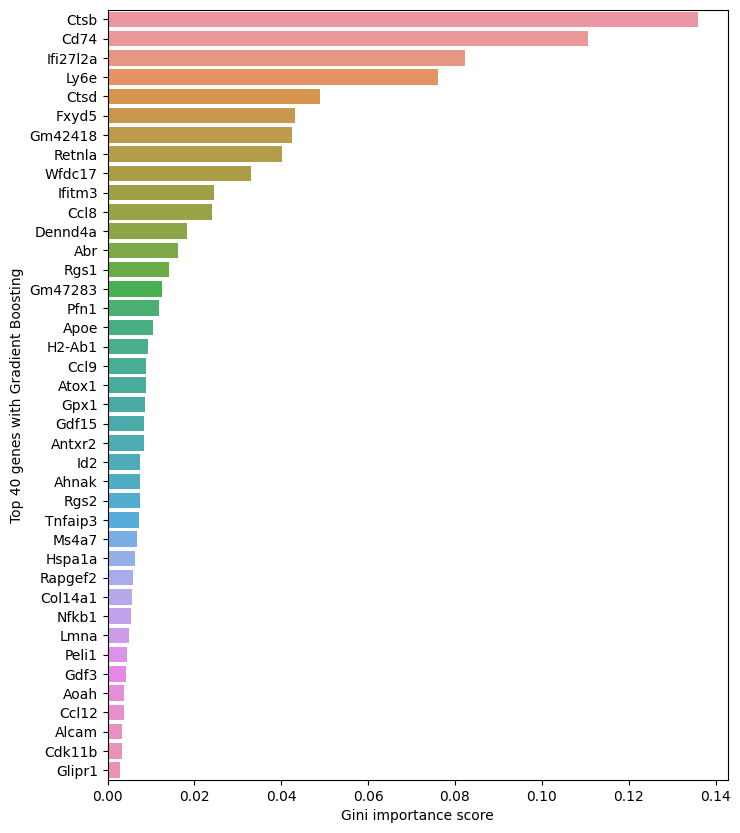

In [33]:
f, ax = plt.subplots(figsize=(8, 10))
ax = sns.barplot(x=feature_scores_top40, y=feature_scores_top40.index)
ax.set_yticklabels(feature_scores_top40.index)
ax.set_xlabel("Gini importance score")
ax.set_ylabel("Top 40 genes with Gradient Boosting")
plt.show()

In [34]:
from sklearn.metrics import roc_curve, auc

In [35]:
y_score1 = gb.predict_proba(X_test)[:, 1]

In [36]:
fpr1, tpr1, _ = roc_curve(y_test, y_score1)
roc_auc1 = auc(fpr1, tpr1)

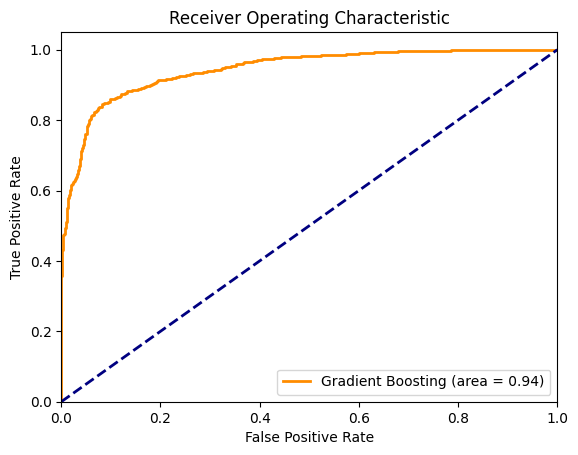

In [37]:
plt.figure()
lw = 2
plt.plot(fpr1, tpr1, color='darkorange', lw=lw, label='Gradient Boosting (area = %0.2f)' % roc_auc1)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()